In [1]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, 'analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# event weight

In [2]:
ovrelay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates//prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_06_21_vertices.csv')
genie = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_06_21_genie.csv')

In [3]:
overlay_genie_CC1p0pi=genie[genie['IsCC_1p_200MeVc_0pi']==True]

In [4]:
mup = ovrelay[ovrelay['1mu-1p']==True]

# GENIE samples

In [5]:
mA_array = [0.80,0.90,0.99,1.10,1.20,1.40]
genie_CC1p0pi = dict()
for mA in mA_array:
    genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/afro_genie_samples/CC_100k_mA_%.2f.csv'%mA)
    genie_CC1p0pi[mA] = genie_sample[genie_sample['IsCC_1p_200MeVc_0pi']==True]
    print len(genie_CC1p0pi[mA]),'CC1p0π events in GENIE samples with mA=%.2f'%mA

32163 CC1p0π events in GENIE samples with mA=0.80
33824 CC1p0π events in GENIE samples with mA=0.90
34849 CC1p0π events in GENIE samples with mA=0.99
36196 CC1p0π events in GENIE samples with mA=1.10
37239 CC1p0π events in GENIE samples with mA=1.20
38810 CC1p0π events in GENIE samples with mA=1.40


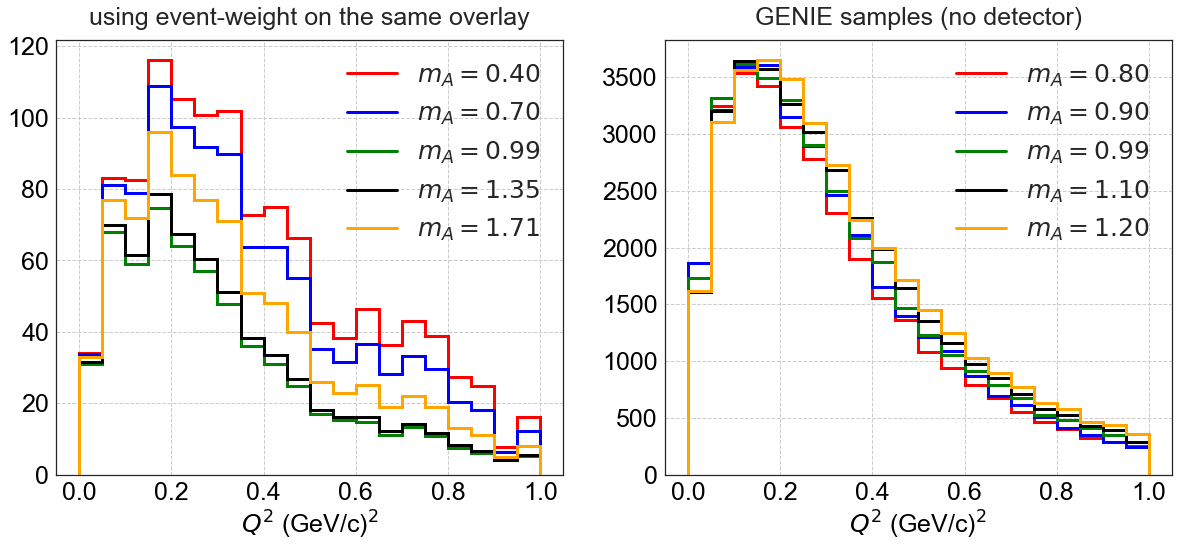

In [6]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(1,2,1)
bins=linspace(0,1,21)
x_label=r'$Q^2$ (GeV/c)$^2$'
# plt.hist(overlay_genie_CC1p0pi['truth_Q2'],bins=bins,histtype='step'
#              ,linewidth=3#,normed=1
#              ,label='default',color='yellow');

for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                   ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    plt.hist(overlay_genie_CC1p0pi['truth_Q2'],weights=overlay_genie_CC1p0pi['evwgh_mA'+name],bins=bins,histtype='step'
             ,linewidth=3#,normed=1
             ,label=None,color=color);
    plt.plot([0,0],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,x_label,'',do_add_grid=True,alpha_grid=1,do_add_legend=True,title='using event-weight on the same overlay')


ax=fig.add_subplot(1,2,2)
bins=linspace(0,1,21)
for mA,color in zip(mA_array
                    ,['red','blue','green','black','orange']):
    Q2 = genie_CC1p0pi[mA]['Q2']
    hGenie,edges = np.histogram(Q2,bins=bins)
    plt.hist(Q2,bins=bins,histtype='step',linewidth=3#,normed=1
             ,label=None,color=color);
    plt.plot([0,0],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,x_label,'',do_add_grid=True,alpha_grid=1,do_add_legend=True,title='GENIE samples (no detector)')


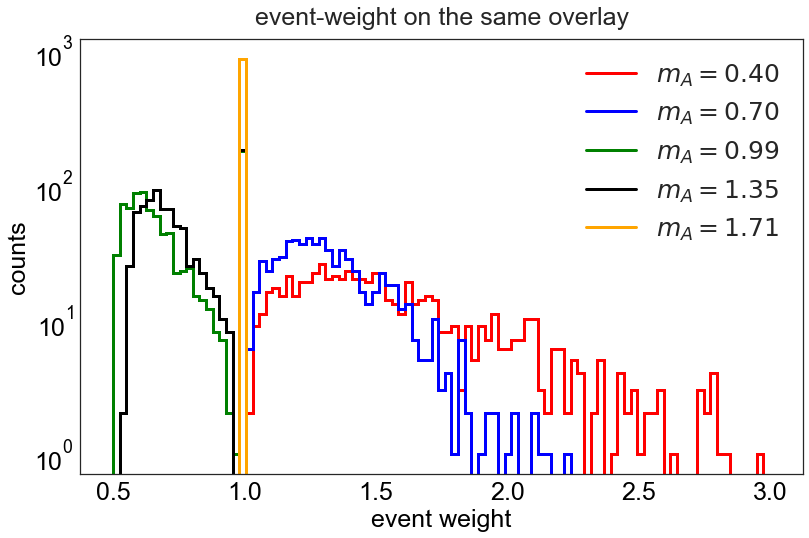

In [18]:
fig=plt.figure(figsize=(12.944,8))
ax=fig.add_subplot(1,1,1)
bins=linspace(0.5,3,100)
x_label=r'$Q^2$ (GeV/c)$^2$'
for mA,name,color in zip([0.40,0.70,0.99,1.35,1.71]
                   ,['040','070','099','135','171']
                         ,['red','blue','green','black','orange']):
    plt.hist(overlay_genie_CC1p0pi['evwgh_mA'+name],bins=bins,histtype='step'
             ,linewidth=3#,normed=1
             ,label=None,color=color);
    plt.plot([0.5,0.5],[0,0],linewidth=3,color=color,label='$m_A=%.2f$'%mA)
set_axes(ax,'event weight','counts',do_add_legend=True,title='event-weight on the same overlay')
ax.set_yscale('log')